In [9]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\HP\\Downloads\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.ndim)
print(df.shape)


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1                   All-Bran   K    C        70        4    1     260    9.0   
2  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
3         Cracklin'_Oat_Bran   K    C       110        3    3     140    4.0   
4      Post_Nat._Raisin_Bran   P    C       120        3    1     200    6.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3    1.00  0.33  68.402973  
1    7.0       5     320        25      3    1.00  0.33  59.425505  
2    8.0       0     330        25      3    1.00  0.50  93.704912  
3   10.0       7     160        25      3    1.00  0.50  40.448772  
4   11.0      14     260        25      3    1.33  0.67  37.840594  
2
(74, 16)


In [10]:
dfnew = df[['calories',
'protein',
'fat',
'sodium',
'fiber',
'carbo',
'sugars',
'potass',
'vitamins','rating']]

In [11]:
dfnew.head(5)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,70,4,1,260,9.0,7.0,5,320,25,59.425505
2,50,4,0,140,14.0,8.0,0,330,25,93.704912
3,110,3,3,140,4.0,10.0,7,160,25,40.448772
4,120,3,1,200,6.0,11.0,14,260,25,37.840594


In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(dfnew)
y_kmeans = kmeans.predict(dfnew)

In [21]:
y_kmeans

array([ 6,  0,  6,  7,  4,  4,  2,  8,  8,  5,  1,  1,  4,  8,  3,  8,  7,
        8,  3,  3,  5,  8,  5,  8,  7,  1,  5,  8,  2,  4,  5,  5,  3,  7,
        1,  7,  8,  1,  8, 11, 11,  3,  7,  8,  2,  7,  1,  8,  1,  1,  7,
        3, 10, 10,  7,  2,  7,  2,  3,  3,  2,  2,  2,  5,  8,  2, 11,  9,
       11,  3,  5,  1,  1,  8])

In [22]:
dfnew.head()
df3 = dfnew.assign(clusterNo = y_kmeans, namex = df['name'])
print(df3.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        70        4    1     260    9.0    7.0       5     320        25   
2        50        4    0     140   14.0    8.0       0     330        25   
3       110        3    3     140    4.0   10.0       7     160        25   
4       120        3    1     200    6.0   11.0      14     260        25   

      rating  clusterNo                      namex  
0  68.402973          6                  100%_Bran  
1  59.425505          0                   All-Bran  
2  93.704912          6  All-Bran_with_Extra_Fiber  
3  40.448772          7         Cracklin'_Oat_Bran  
4  37.840594          4      Post_Nat._Raisin_Bran  


In [24]:
from pandasql import sqldf
print(sqldf("select * from df3 where clusterno=6"))

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        50        4    0     140   14.0    8.0       0     330        25   

      rating  clusterNo                      namex  
0  68.402973          6                  100%_Bran  
1  93.704912          6  All-Bran_with_Extra_Fiber  


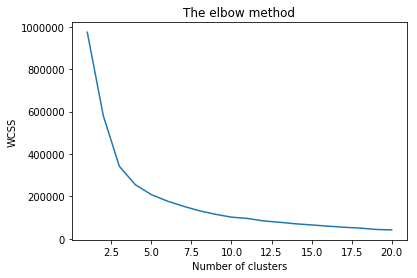

In [19]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 21), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [26]:
x = dfnew.iloc[:, [0,1, 2, 3, 4,5,6,7,8]].values
y = dfnew.iloc[:,9]
kmeans = KMeans(n_clusters = 12, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [27]:
y_kmeans

array([ 3, 11,  3,  9,  5,  5,  1, 10,  2,  6,  0,  0,  5, 10,  4, 10,  9,
        2,  4,  4,  6,  2,  6, 10,  9,  2,  6, 10,  1,  5,  6,  6,  4,  9,
        2,  6, 10,  0,  2,  7,  7,  4,  9,  2,  1,  9,  0,  2,  0,  2,  9,
        4,  8,  8,  9,  1,  9,  1, 10,  4,  1,  1,  1,  6, 10,  1,  7,  5,
        7,  4,  6,  0,  0,  2])

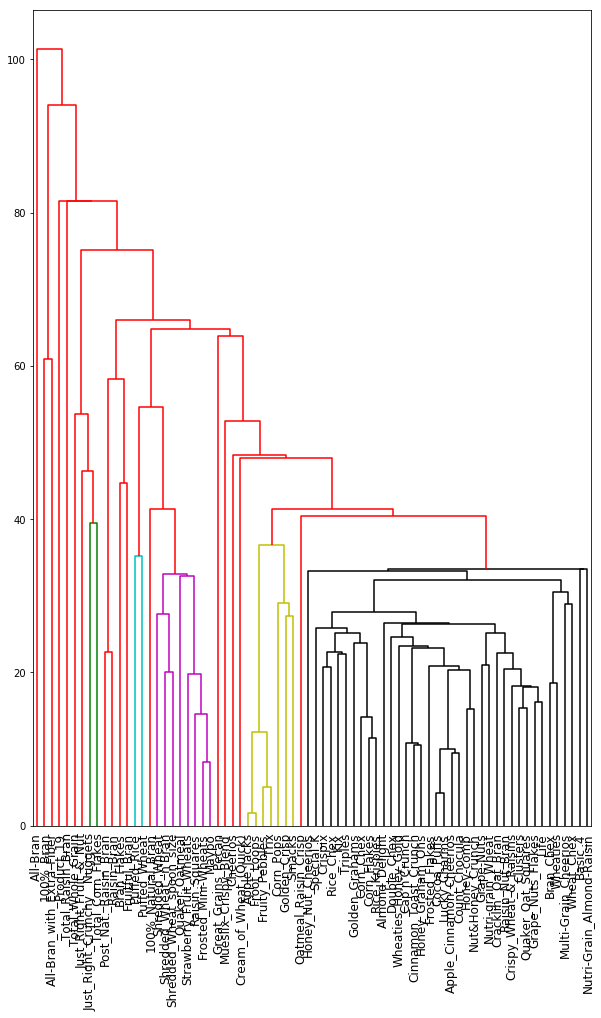

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

#df = df.set_index('name')
#del df.index.name

linked = linkage(dfnew, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 15))  
dendrogram(linked, orientation='top',labels=df.index, color_threshold=40, above_threshold_color='red', leaf_font_size=12)
plt.show()

# method=’single’ assigns
# method=’complete’ assigns, ’average’ ’weighted’ ’centroid’
# ’ward’
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

#laspp, 

#dendrogram(linked, orientation='left', labels=df.index, color_threshold=40, above_threshold_color='red', 
#truncate_mode='lastp',    p=20)

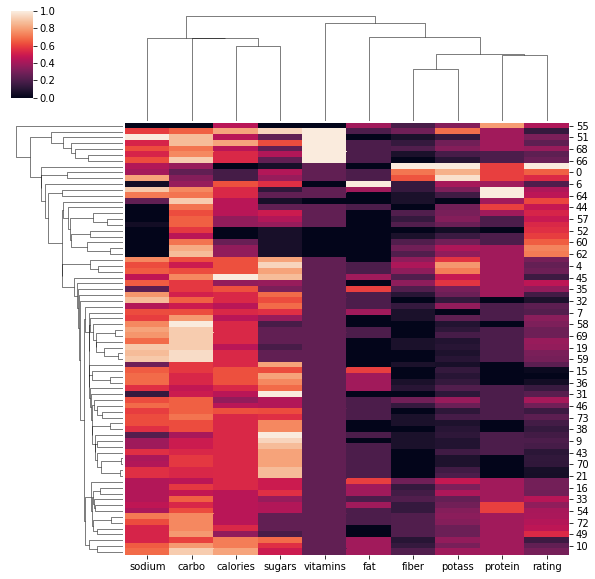

In [56]:
import seaborn as sns
sns.clustermap(dfnew, metric="euclidean", standard_scale=1, method="single")